# Data Science Coursework
### Adarsh Manoj 6532510
#### COMM054

In [1107]:
### Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

In [1108]:
### Importing the necessary functions
from sklearn.preprocessing import scale
from sklearn.naive_bayes import GaussianNB, ComplementNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, cohen_kappa_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold

In [1109]:
### Decalring the functions that will be used later on.
def precision(label, confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()
    
def recall(label, confusion_matrix):
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()
def precision_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_precisions = 0
    for label in range(rows):
        sum_of_precisions += precision(label, confusion_matrix)
    return sum_of_precisions / rows
def recall_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_recalls = 0
    for label in range(columns):
        sum_of_recalls += recall(label, confusion_matrix)
    return sum_of_recalls / columns
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements
def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [1110]:
### Importing the dataset
cancer=pd.read_csv("cancerdata.csv")

In [1111]:
### Exploring the dataset
cancer.head()

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,4.454847,2.386095,2.295170,2.530536,2.723036,2.393815,3.582104,2.591299,3.199268,0
1,4.454847,4.637212,4.603958,5.742196,7.896027,8.074609,3.582104,3.344739,3.199268,0
2,2.824082,2.386095,2.295170,2.530536,2.723036,3.025014,3.582104,2.591299,3.199268,0
3,5.270230,7.638702,7.682342,2.530536,3.757634,4.287413,3.582104,7.111938,3.199268,0
4,3.639465,2.386095,2.295170,4.136366,2.723036,2.393815,3.582104,2.591299,3.199268,0


In [1112]:
cancer.dtypes

Cl.thickness       float64
Cell.size          float64
Cell.shape         float64
Marg.adhesion      float64
Epith.c.size       float64
Bare.nuclei        float64
Bl.cromatin        float64
Normal.nucleoli    float64
Mitoses            float64
Class                int64
dtype: object

array([[<AxesSubplot:title={'center':'Cl.thickness'}>,
        <AxesSubplot:title={'center':'Cell.size'}>,
        <AxesSubplot:title={'center':'Cell.shape'}>],
       [<AxesSubplot:title={'center':'Marg.adhesion'}>,
        <AxesSubplot:title={'center':'Epith.c.size'}>,
        <AxesSubplot:title={'center':'Bare.nuclei'}>],
       [<AxesSubplot:title={'center':'Bl.cromatin'}>,
        <AxesSubplot:title={'center':'Normal.nucleoli'}>,
        <AxesSubplot:title={'center':'Mitoses'}>],
       [<AxesSubplot:title={'center':'Class'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

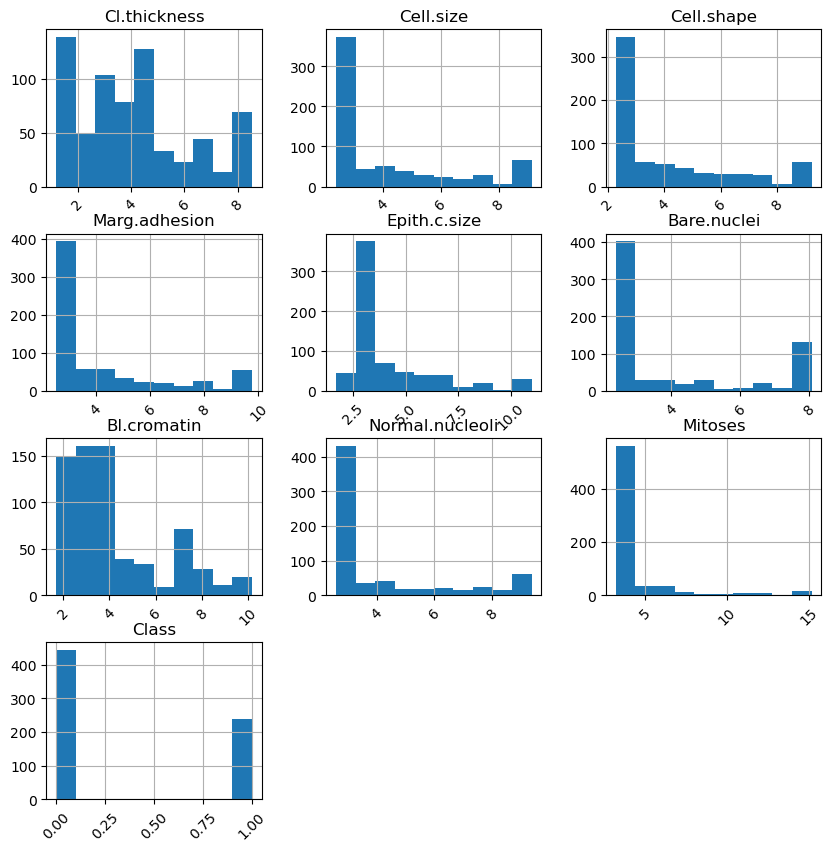

In [1113]:
cancer.hist(figsize=(10,10), xrot=45)
#plt.show()

In [1114]:
cancer.describe()

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.349927
std,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,0.477296
min,1.193317,2.386095,2.295170,2.530536,1.688438,2.393815,1.704320,2.591299,3.199268,0.000000
25%,2.008699,2.386095,2.295170,2.530536,2.723036,2.393815,2.643212,2.591299,3.199268,0.000000
50%,3.639465,2.386095,2.295170,2.530536,2.723036,2.393815,3.582104,2.591299,3.199268,0.000000
75%,5.270230,5.387585,5.373554,4.939281,4.792233,5.549811,5.459887,4.851618,3.199268,1.000000
max,8.531761,9.139446,9.221535,9.756771,10.999821,8.074609,10.154346,9.372257,15.146119,1.000000


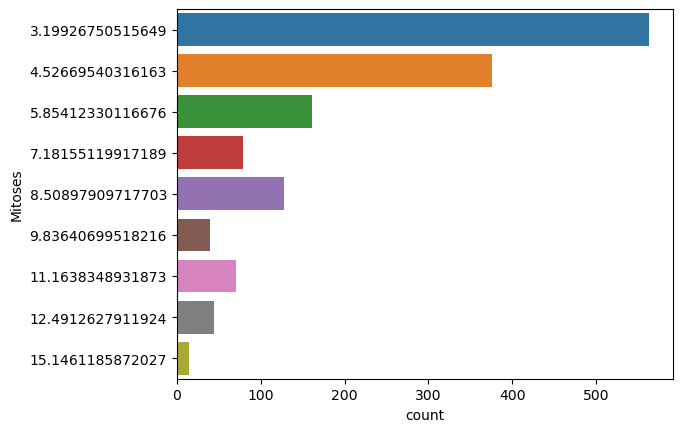

In [1115]:
for col in cancer.select_dtypes(include='float64'):
    if cancer[col].nunique() <= 22:
        sns.countplot(y=col, data=cancer)
        #plt.show()

In [1116]:
col_names = list(cancer.columns)
col_names_no_class = col_names[ : -1]


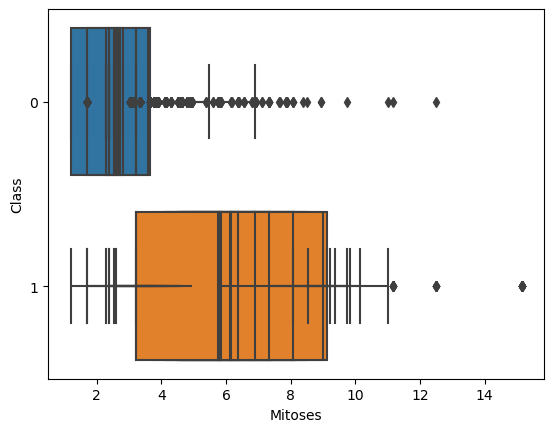

In [1117]:

num_cols = col_names_no_class
for col in num_cols:
    sns.boxplot(y = cancer['Class'].astype('category'), x = col, data=cancer)
   # plt.show()

In [1118]:
corr = cancer.corr()


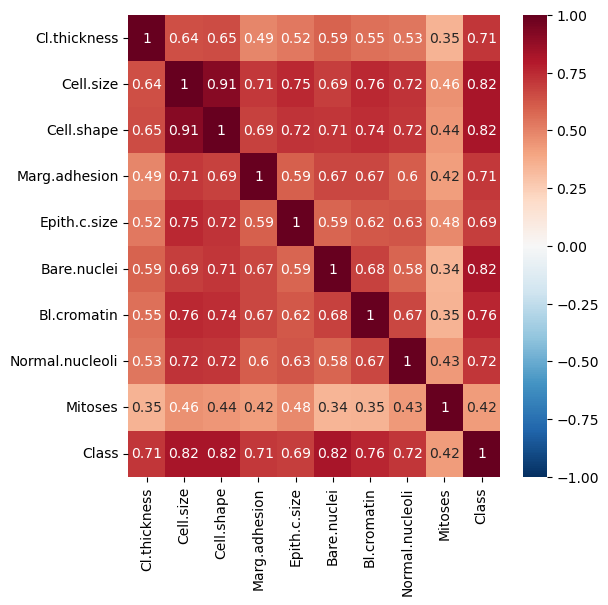

In [1119]:
plt.figure(figsize=(6,6))
sns.heatmap(corr, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

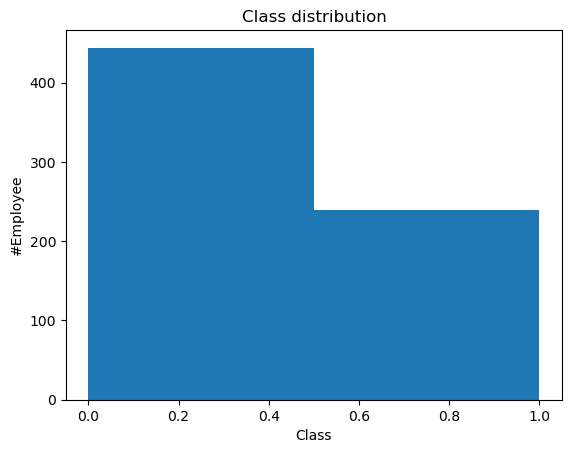

In [1120]:
fig=plt.figure()
#Create one or more subplots using add_subplot, because you can't create blank figure
ax = fig.add_subplot(1,1,1)
#Variable
ax.hist(cancer['Class'],bins = 2)
#Labels and Tit
plt.title('Class distribution')
plt.xlabel('Class')
plt.ylabel('#Employee')
plt.show()

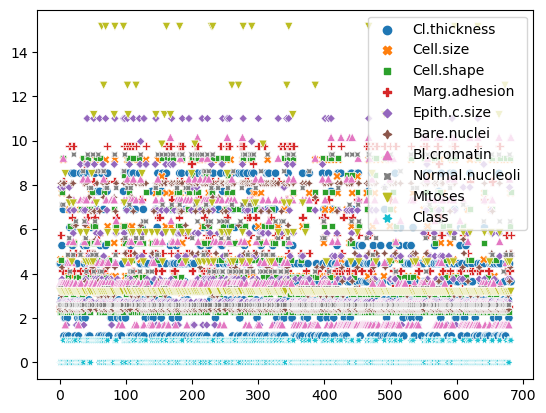

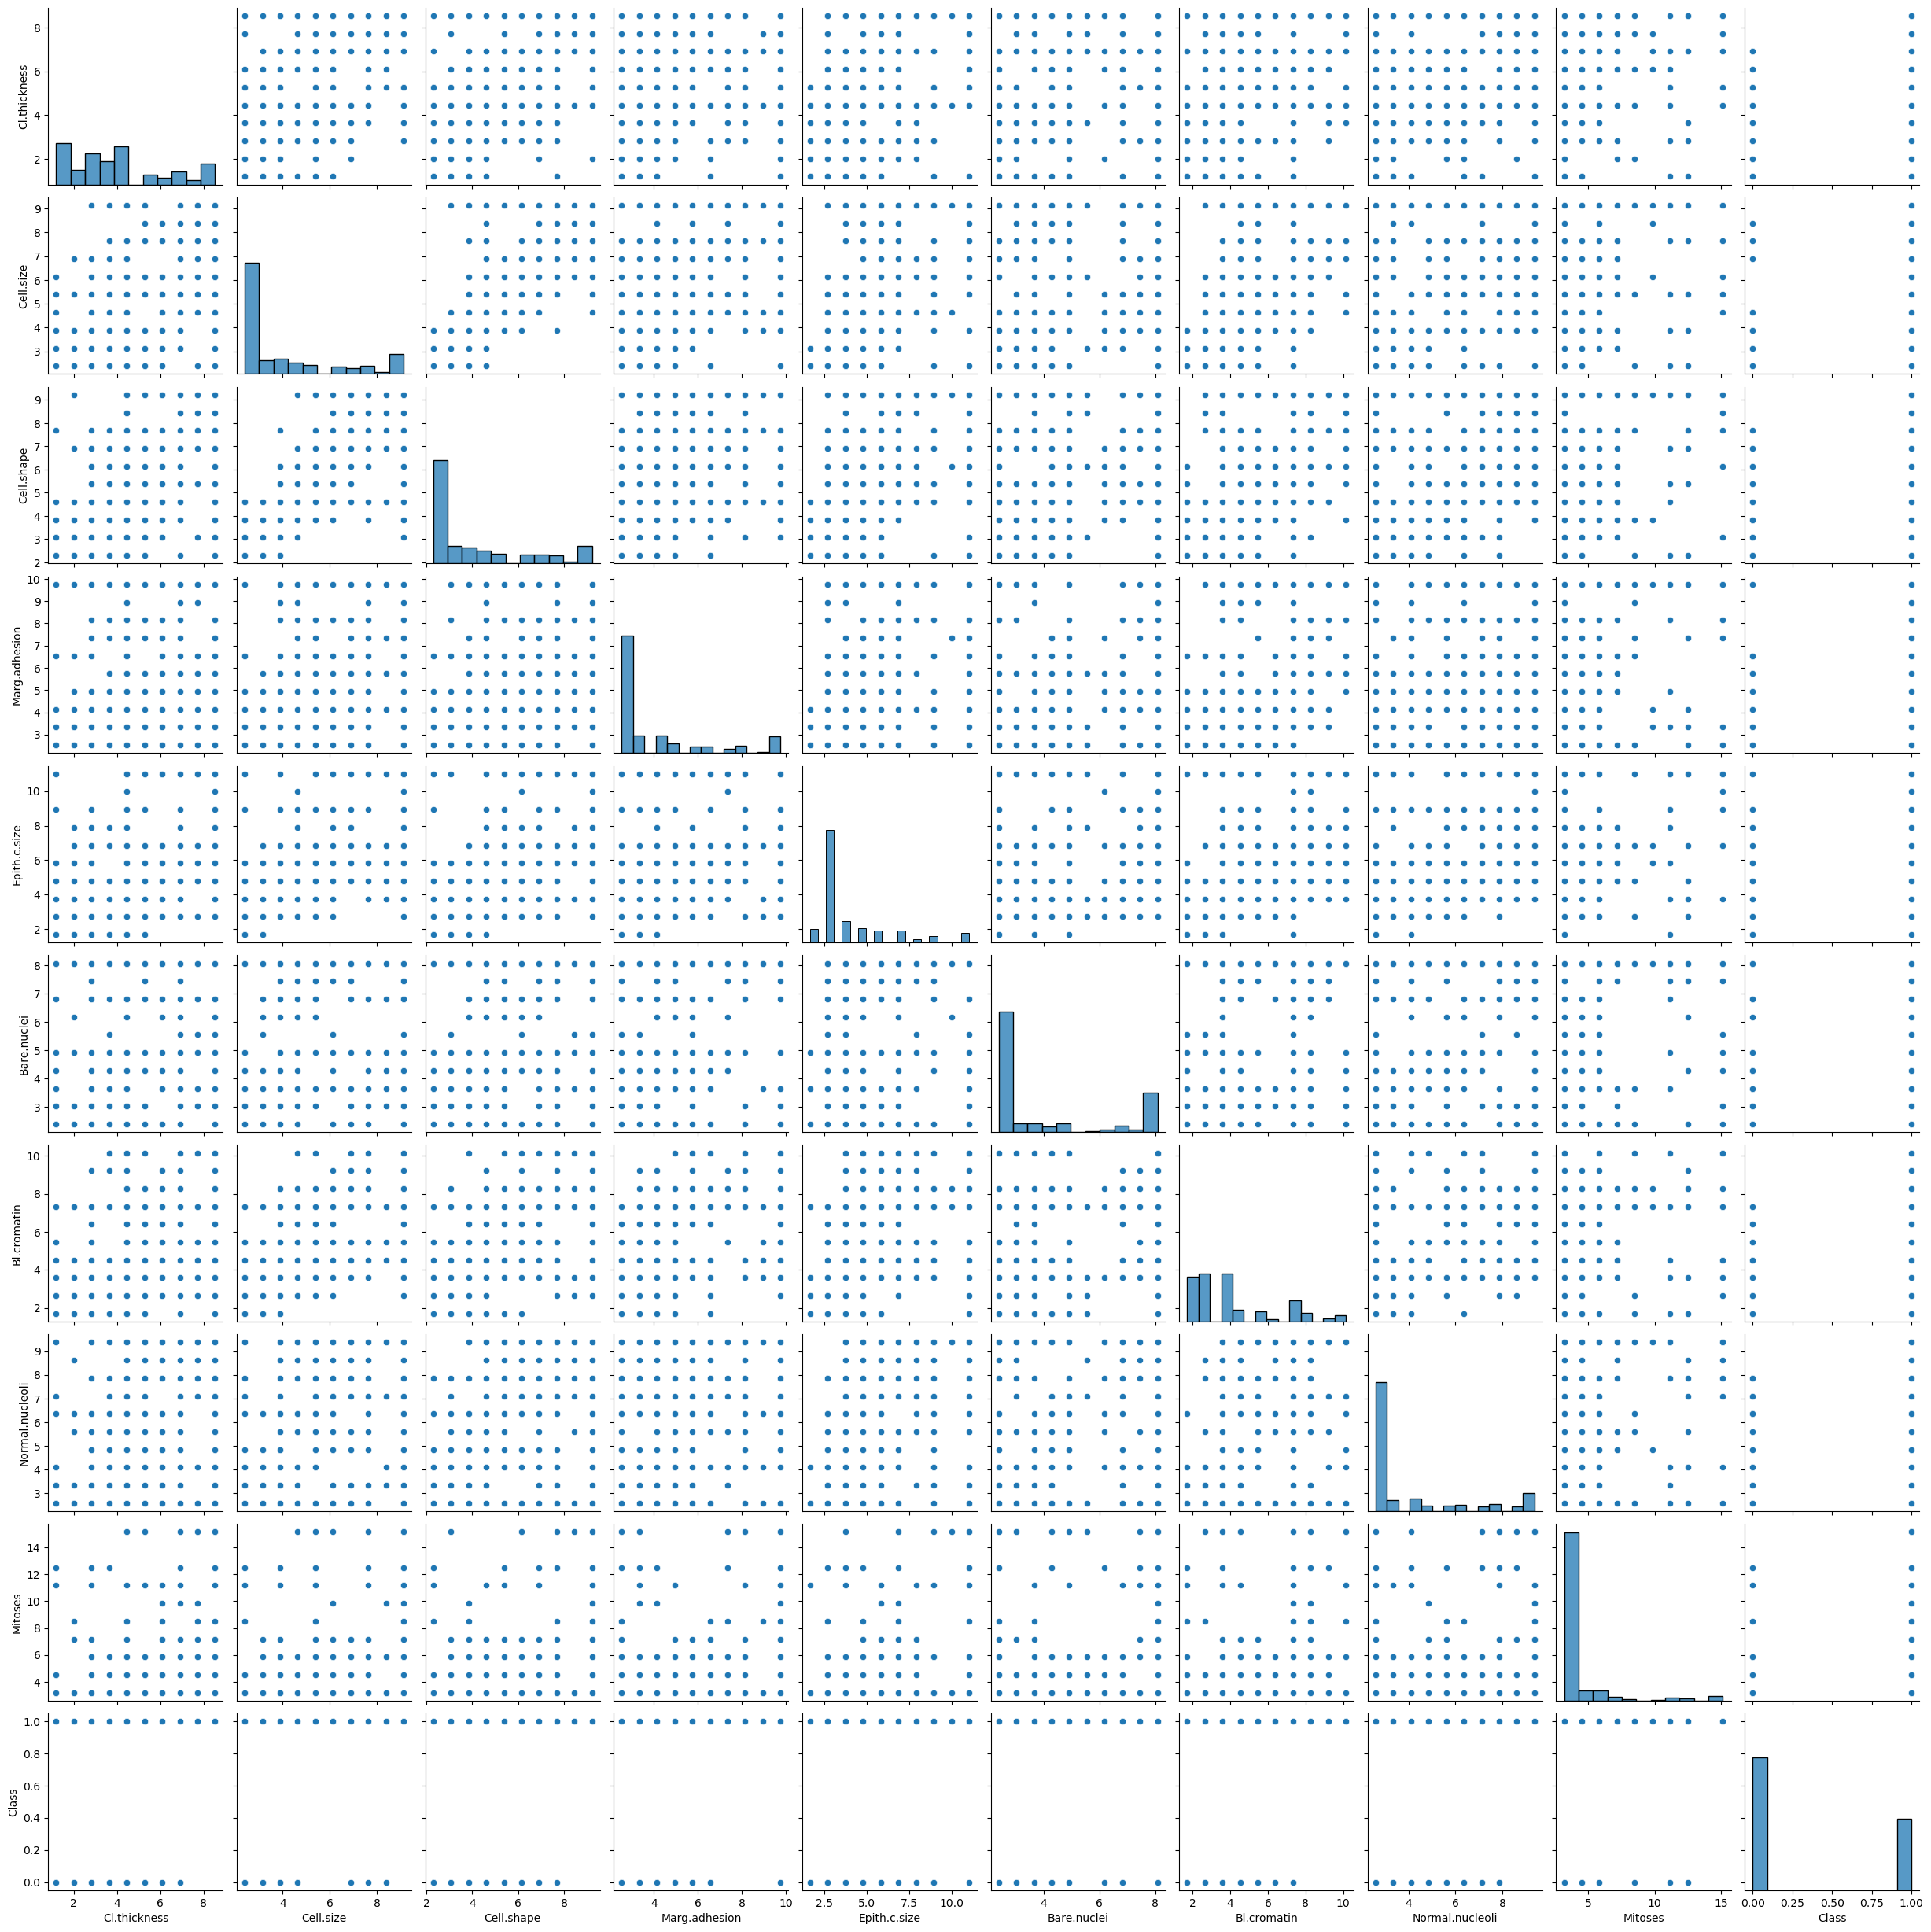

In [1121]:
sns.scatterplot(data=cancer)
sns.pairplot(cancer)

In [1122]:
#corr.sort_values('Class')
corr_class = pd.DataFrame(corr['Class'])
corr_class.sort_values('Class')

,Class
Mitoses,0.423448
Epith.c.size,0.690958
Marg.adhesion,0.706294
Cl.thickness,0.714790
Normal.nucleoli,0.718677
Bl.cromatin,0.758228
Cell.size,0.820801
Cell.shape,0.821891
Bare.nuclei,0.822696
Class,1.000000


In [1123]:
low_corr_cols = []
for index, row in corr_class.iterrows():
    threshold=0.70
    #print(index)
    if row['Class'] < threshold:
        low_corr_cols.append(index)
    #print(low_corr_cols)

In [1124]:
class_count_0, class_count_1 = cancer['Class'].value_counts()
class_ratio = class_count_0/class_count_1
print(class_count_0, class_count_1, class_ratio)

444 239 1.8577405857740585


In [1125]:
###LABELLED DATASET
labels=cancer['Class']

In [1126]:
###UNLABELLED DATASET
unlabel=cancer.loc[:, cancer.columns != 'Class']

In [1127]:
labels_df=pd.DataFrame({'Class':cancer['Class']})
labels_df

,Class
0,0
1,0
2,0
3,0
4,0
...,...
678,0
679,0
680,1
681,1


In [1128]:
unlabel


,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
0,4.454847,2.386095,2.295170,2.530536,2.723036,2.393815,3.582104,2.591299,3.199268
1,4.454847,4.637212,4.603958,5.742196,7.896027,8.074609,3.582104,3.344739,3.199268
2,2.824082,2.386095,2.295170,2.530536,2.723036,3.025014,3.582104,2.591299,3.199268
3,5.270230,7.638702,7.682342,2.530536,3.757634,4.287413,3.582104,7.111938,3.199268
4,3.639465,2.386095,2.295170,4.136366,2.723036,2.393815,3.582104,2.591299,3.199268
...,...,...,...,...,...,...,...,...,...
678,2.824082,2.386095,2.295170,2.530536,3.757634,3.025014,1.704320,2.591299,3.199268
679,2.008699,2.386095,2.295170,2.530536,2.723036,2.393815,1.704320,2.591299,3.199268
680,4.454847,9.139446,9.221535,4.136366,7.896027,3.656214,8.276563,9.372257,4.526695
681,3.639465,7.638702,6.143150,4.939281,3.757634,4.287413,10.154346,6.358498,3.199268


In [1129]:
### DROPPING LOW-CORRELATION COLUMNS
#low_corr_cols
dropped_unlabel=unlabel.drop(columns=low_corr_cols)
dropped_unlabel

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Bare.nuclei,Bl.cromatin,Normal.nucleoli
0,4.454847,2.386095,2.295170,2.530536,2.393815,3.582104,2.591299
1,4.454847,4.637212,4.603958,5.742196,8.074609,3.582104,3.344739
2,2.824082,2.386095,2.295170,2.530536,3.025014,3.582104,2.591299
3,5.270230,7.638702,7.682342,2.530536,4.287413,3.582104,7.111938
4,3.639465,2.386095,2.295170,4.136366,2.393815,3.582104,2.591299
...,...,...,...,...,...,...,...
678,2.824082,2.386095,2.295170,2.530536,3.025014,1.704320,2.591299
679,2.008699,2.386095,2.295170,2.530536,2.393815,1.704320,2.591299
680,4.454847,9.139446,9.221535,4.136366,3.656214,8.276563,9.372257
681,3.639465,7.638702,6.143150,4.939281,4.287413,10.154346,6.358498


(array([373.,  45.,  52.,  38.,  30.,  25.,  19.,  28.,   6.,  67.]),
 array([2.38609516, 3.06143029, 3.73676542, 4.41210055, 5.08743568,
        5.76277081, 6.43810594, 7.11344107, 7.7887762 , 8.46411133,
        9.13944646]),
 <BarContainer object of 10 artists>)

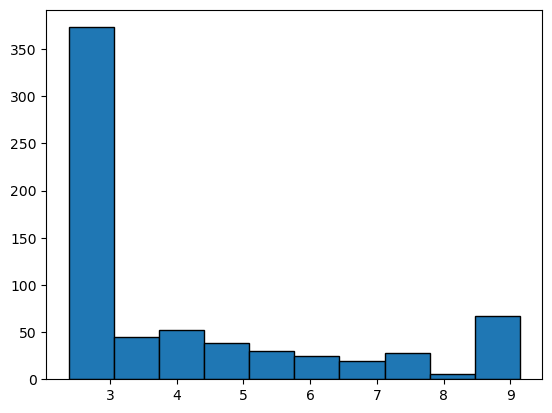

In [1130]:
### SEE IF DATA IS NORMALIZED
plt.hist(dropped_unlabel['Cell.size'], edgecolor='black', bins=10)

## Proper Use of Scaling
As can be seen below there are two scaled arrays which represents the two diffetent types of scaled datasets. One for the Naive Bayes (NB) Model, and one for the Logisitic Regression (LR) Model.

In [1131]:
NB_scaled = sklearn.preprocessing.scale(dropped_unlabel)

The cell above is the scaled dataset for the NB model,this was accomplished using the sci-kit learn's package for scaling. In order to satify the Naive Bayes model the dataset needed to be scaled to a mean of 0 and a standard deviation of 1, which the * scale() * function took care of. 

In [1132]:
s = sklearn.preprocessing.MinMaxScaler()
LR_scaled = s.fit_transform(dropped_unlabel)

The cell above is the scaled dataset for the LR model,this was accomplished using the sci-kit learn's package for scaling in particular the * MinMaxScaler() *.  In order to satify the LR model the dataset needed to not contiain negative values, but ideally must also retain the same feature importance - this is where the * MinMaxScaler * function comes in handy. It divides by the range after subtracting the feature's minimum value, the range is defined as difference between the first maximum and initial minimum. The default feautre range of the output dataset is scaled to a range of [0,1].

In [1133]:
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

Y_reshape = np.reshape(labels, (683))

##NB
X_train, X_test, y_train, y_test = train_test_split(NB_scaled, Y_reshape, test_size=1 - train_ratio, random_state=45)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state=45) 

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

##LR
X_train1, X_test1, y_train1, y_test1 = train_test_split(LR_scaled, Y_reshape, test_size=1 - train_ratio, random_state=45)

X_val1, X_test1, y_val1, y_test1 = train_test_split(X_test1, y_test1, test_size=test_ratio/(test_ratio + validation_ratio), random_state=45) 

print(X_train1.shape, X_val1.shape, X_test1.shape)
print(y_train1.shape, y_val1.shape, y_test1.shape)

(478, 7) (102, 7) (103, 7)
(478,) (102,) (103,)
(478, 7) (102, 7) (103, 7)
(478,) (102,) (103,)


In [1134]:
### SPLITTING THE DATASET
#Y_reshape = np.reshape(labels, (683))
#X_train, X_test, y_train, y_test = train_test_split(NB_scaled, Y_reshape, test_size=0.33, random_state=45)
#X_train1, X_test1, y_train1, y_tes1 = train_test_split(LR_scaled, Y_reshape, test_size=0.33, random_state=45)

In [1135]:
### Ensuring the shapes of the data are consistent
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(478, 7)
(103, 7)
(478,)
(103,)


In [1136]:
### Ensuring the shapes of the data are consistent
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(478, 7)
(103, 7)
(478,)
(103,)


### Application of Appropriate Naive Bayes Model

Seeing as the task at hand is to implement a NB model, and the limiation was to use the sci-kitlearn packages Naive Bayes model. The package provides the option for five different models, they differ on their assumption of the distribution of the probabiltiy:

1. Gaussian Naive Bayes (GNB) - for gaussian distributions
2. Multinomial Naive Bayes (MNB) - for multinomial distributions
3. Complement Naive Bayes (CNB) - for imbalanced datasets
4. Bernoulli Naive Bayes (BNB) - for discrete data and binary classification problems
5. Categorical Naive Bayes (CaNB) - for categoricaly distirbuted data

For the Naive Bayes approach, two implementations were followed, the CNB model, and the Bernoulli NB (BNB) model. The reason for using the CNB model over the GNB and MNB was that sci-kitlearn author's indicated that for classification problems CNB and BNB typically outperformed the other options.

In [1137]:
### Complement NB Model.
cnbModel = ComplementNB()
### Bernoulli NB Model.
bnbModel = BernoulliNB()

### Application of Appropriate Logisitic Regression
To implement the LR model the sci-kitlearn LinearRegression library was needed as the logistic regression model is actually an implementation of a linear model for classification purposes. The package provides three options for regression: binary, One-vs-Rest, or multinomial logistic regression. Seeing as the task at hand is binary classification that will be the option going forward. 

In [1138]:
### Logisitc Regrssion Model.
lrModel = LogisticRegression(solver="liblinear", random_state=45)

The implemented package takes/declares various parameters, however the parmeters tuned for this model were only the solver, and random state. The solver chosen was liblinear, as the author's of the package encouraged this solver when using relatively small datasets (which is the case). By selecting liblinear as the solver, this also defaults the penalty term to follow l2 Regularization. The random state parameter is a parmeter to shuffle the data and is by default implemented with the liblinear solver.

In [1139]:
### Fitting the BNB model
bnbModel.fit(X_train,y_train)

BernoulliNB()

In [1140]:
### Fitting the CNB model
cnbModel.fit(X_train1,y_train1)

ComplementNB()

In [1141]:
### Fitting the LR model
lrModel.fit(X_train1, y_train1)

LogisticRegression(random_state=45, solver='liblinear')

In [1142]:
### Visiualing the BNB model's attributes post fitting
#print(bnbModel.intercept_.shape)
#print(bnbModel.class_count_)
#print(bnbModel.classes_)
#print(bnbModel.class_log_prior_)
#print(bnbModel.feature_count_)
#print(bnbModel.feature_log_prob_)

In [1143]:
### Visiualing the CNB model's attributes post fitting
#print(cnbModel.intercept_.shape)
#print(cnbModel.class_count_)
#print(cnbModel.classes_)
#print(cnbModel.class_log_prior_)
#print(cnbModel.feature_count_)
#print(cnbModel.feature_log_prob_)

In [1144]:
### Visiualing the LR model's attributes post fitting
#print(lrModel.intercept_.shape)
#print(lrModel.classes_)
#print(lrModel.coef_)
#print(lrModel.n_iter_)

# Model Performance

## NB Model


Naive Bayes is an extension of Bayes' theorem for the purpose of classification tasks by assiging each data point to a given class. Bayes' theorem is the foundation for for conditional probability, which identifies the probability of an event A occuring given B is true, $P(A~|~{\rm B})$, which would equate to:

$$
P(A~|~{\rm B}) = \frac{P({\rm B}~|~A)P(A)}{P({\rm B})}
$$
  

Within Naive Bayes model's there exists various circumstances to implement the different event models (GNB, MNB, BNB, etc.), however, all Bayesian classifiers assume one common princple: given the class, the value of one feature is independent of the value of any other feature. It's for this exact reason that Naive Bayes model has the word 'naive' in-front of it. With this in mind we can extend Bayes' theorem to a NB classifier by finding for 

$$
P(c_{k}~|~{\rm x_{i}}) = \frac{P({\rm x_{i}}~|~c_{k})P(c_{k})}{P({\rm x_{i}})} 
$$

where 

$ P(c_{k}) = $ [prior], probability of a value being part of class k

$ P({\rm x_{i}}~|~c_{k}) = $ [likelihood], probability of datapoint i being a part of class k 

since $ x_{i} $ is known the above function can be extrapolated to look like:

$$
P(c_{k}|x_{i}) ∝ P(x_{i}|c_{k})P(c_{k})
$$

The final product being a proability function that can handle multi-featured/variabled inputs:

$$
P(x_{i,1},x_{i,2}, .., x_{i,p}|c_{k}) = \prod \limits _{j=1} ^{p}
P(x_{i,j}|c_{k})
$$


As covered in the lectures, for Bayesian models there exists multiple options for parameter estimation such as Maximum Likelihood Estimation (MLE) and Maximum A Poseterior (MAP). Parameter estimation being the function to help infer the parameters of a model based on the method chosent to ultimately ensure suitable model performance. 

The package sci-kit learn implements MAP as it's parameter estimator as does most Bayesian models. The key difference between MLE and MAP is that MAP factors into consideration the prior value unlike MLE, which only maximises the likelihood. 

## LR Model


Logistic Regression is a stastical model that identifies the probability of an event occuring by computing the log-odds for the event based on one or more input features, it assumes indpenendence between features. Seeing as our problem can be idetified as a binary classification problem, it's right to assume that the class ditribution $$Y ∈ [0,1] $$
$ ∴ Y \sim Be(p)$ follows a Bernoulli distribution, allowing for $p$ to host values between 0 and 1. This enables the odds value to range from 0 to infinity, and if a logit is perormed on the odds value the range of the log-odds is as show $-∞ < log(\frac{p}{1-p}) < ∞ $. 

The log-odds value can then be understood to equate to the product of the transposed weighted values and X values: 
$$log\frac{p}{1-p} = \underline θ^T\underline X$$
where 
$\underline X = $ input values and $\underline θ^T = $ the weighted tranposed values.

To put it all the information together into a probability function that follows a Bernoulli distrivbution would like like such:

$$
P(Y=y | P(\underline x |\underline  θ)) = P(\underline x | \underline θ)^y (1-P(\underline x|\underline θ))^{(1-y)}
$$

where

$$
y=[0,1]
$$
$$
θ =  \text parameter \space weightings
$$


MLE is the typical method for esimatation for the theta parameter in LR models, the goal is to maximise the likelihood, this will generate the function: 
$$
L(\underline θ)=\prod \limits _{i=1} ^{n}
P(\underline x^{(i)} | \underline θ)^{y^{(i)}} (1-P(\underline x^{(i)}|\underline θ))^{(1-y)^{(i)}}
$$
where

$$
n=\text total \space dataset
$$

The values generated for $θ$ are the parameter weights for the LR classifier.

To generate the class values from the output values of the probability function, an implementation of a threshold is required such that if $P(\underline x | \underline θ) > \frac {1}{2} $ then $\underline x $ is in class $Y=1$ and vice versa


In [1145]:
print("NB: score on test: " + str(bnbModel.score(X_test, y_test)))
print("NB: score on train: "+ str(bnbModel.score(X_train, y_train)))

print("CNB: score on test: " + str(cnbModel.score(X_test1, y_test1)))
print("CNB: score on train: "+ str(cnbModel.score(X_train1, y_train1)))

print("LR: score on test: " + str(lrModel.score(X_test1, y_test1)))
print("LR: score on train: "+ str(lrModel.score(X_train1, y_train1)))

NB: score on test: 0.9320388349514563
NB: score on train: 0.9790794979079498
CNB: score on test: 0.8543689320388349
CNB: score on train: 0.8765690376569037
LR: score on test: 0.9320388349514563
LR: score on train: 0.9707112970711297


## Model Validation
#### K-Fold Cross Validation Score
Using the sci-kitlearns metric package for cross_val_score and K_fold function, to derive cross validation average scores and standard deviation. The output being an array of n values, n being the number of splits, containgin the cross validation scores of each bin, dividing the validation dataset by number of folds. This value helps in indicating the models' ability in adaptign to new data appended to the dataset, and allows for a more real-world applicaiton of the model.

In [1146]:
### Naive Bayes Model
k_fold = KFold(n_splits=5)
cross_k_score = cross_val_score(bnbModel, X_val, y_val, cv=k_fold, n_jobs=-1)
print(cross_k_score)
nb_cross_k_score_std = np.std(cross_k_score)
nb_cross_k_score_mean = np.mean(cross_k_score)
print("Standard deviation of Cross Validation Scores: " + str(nb_cross_k_score_std))
print("Mean of Cross Validation Scores: " + str(nb_cross_k_score_mean))

[1.        0.9047619 0.95      1.        1.       ]
Standard deviation of Cross Validation Scores: 0.03834442312228075
Mean of Cross Validation Scores: 0.9709523809523809


In [1147]:
### Logisitic Regression Model
k_fold = KFold(n_splits=5)
cross_k_score = cross_val_score(lrModel, X_val1, y_val1, cv=k_fold, n_jobs=-1)
print(cross_k_score)
nb_cross_k_score_std = np.std(cross_k_score)
nb_cross_k_score_mean = np.mean(cross_k_score)
print("Standard deviation of Cross Validation Scores: " + str(nb_cross_k_score_std))
print("Mean of Cross Validation Scores: " + str(nb_cross_k_score_mean))

[1.         0.85714286 0.95       1.         1.        ]
Standard deviation of Cross Validation Scores: 0.05562263523980512
Mean of Cross Validation Scores: 0.9614285714285714


#### Stratified K-Fold Cross Validation 
follows the same principle as KFold cross validation, the key difference being that StratififedK-fold ensures within the folds/splitted dataset still retains the same feautre importance and class balance, similair to that prior to validation performance.

In [1148]:
### Naive Bayes Model
sk_fold = StratifiedKFold(n_splits=5)
cross_sk_score = cross_val_score(bnbModel, X_val, y_val, cv=sk_fold, n_jobs=-1)
print(cross_sk_score)
nb_cross_sk_score_std = np.std(cross_sk_score)
nb_cross_sk_score_mean = np.mean(cross_sk_score)
print("Standard deviation of Cross Validation Scores: " + str(nb_cross_sk_score_std))
print("Mean of Cross Validation Scores: " + str(nb_cross_sk_score_mean))

[1.         0.85714286 1.         1.         1.        ]
Standard deviation of Cross Validation Scores: 0.05714285714285716
Mean of Cross Validation Scores: 0.9714285714285715


In [1149]:
### Logisitic Regression Model
sk_fold = StratifiedKFold(n_splits=5)
cross_sk_score = cross_val_score(lrModel, X_val1, y_val1, cv=sk_fold, n_jobs=-1)
print(cross_sk_score)
nb_cross_sk_score_std = np.std(cross_sk_score)
nb_cross_sk_score_mean = np.mean(cross_sk_score)
print("Standard deviation of Cross Validation Scores: " + str(nb_cross_sk_score_std))
print("Mean of Cross Validation Scores: " + str(nb_cross_sk_score_mean))

[1.         0.80952381 1.         1.         1.        ]
Standard deviation of Cross Validation Scores: 0.07619047619047618
Mean of Cross Validation Scores: 0.9619047619047618


As can be seen all the models achieved very high average cross validation scores, all above 0.95 wiht a standard deviation less than 0.08. This indicates the model was able to succesfully train and weight itself with low underfitting. The NB model on the Stratified K-Fold cross validation (SK-Fold) performed the best with the LR model on K-Fold cross validation.


#### Feature Importance

/Users/adarshmanoj/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


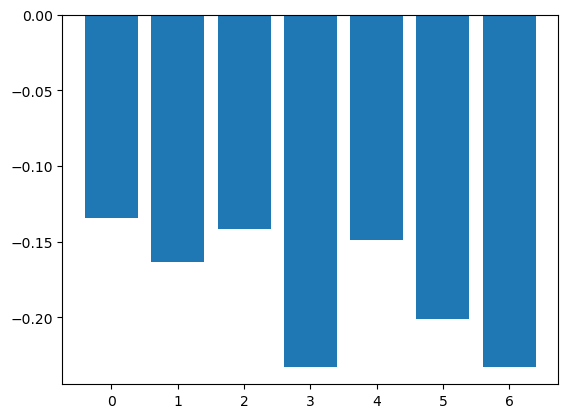

In [1150]:
feature = bnbModel.coef_[0]
# plot feature importance
plt.bar([x for x in range(len(feature))], feature)
plt.show()

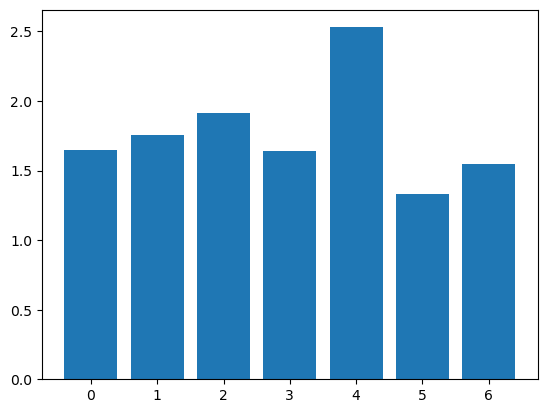

In [1151]:
feature = lrModel.coef_[0]
# plot feature importance
plt.bar([x for x in range(len(feature))], feature)
plt.show()

## Model Performance and Comparison

In [1165]:
### Predict using weighted model
nb_pred = bnbModel.predict_proba(X_test)
#cnb_proba = cnbModel.predict_proba(X_test2)
lr_pred = lrModel.predict_proba(X_test1)

### Confusion Matrix
Below is the code for the NB Models predicted confusion matrix.

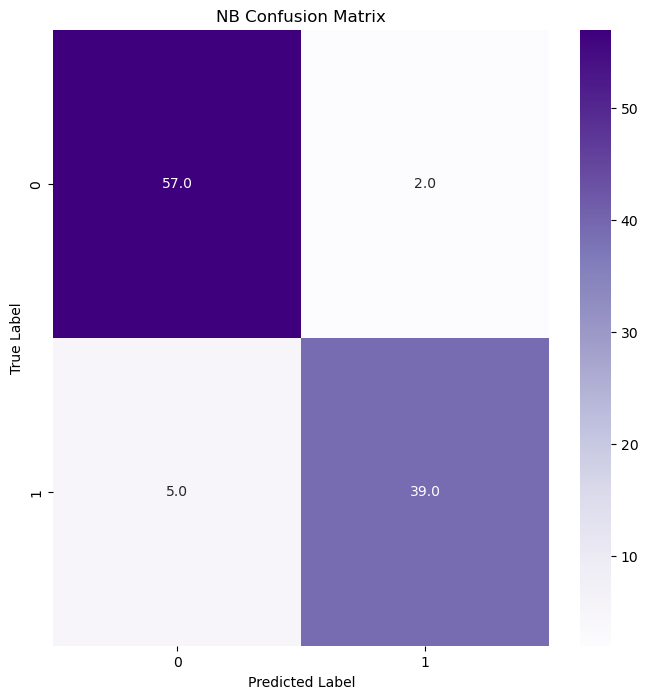

In [1171]:
### NB Model

NB_pred_classes = np.argmax(nb_pred,axis = 1) 
Y_true = y_test.to_numpy()



nb_confusion_mtx = confusion_matrix(Y_true, NB_pred_classes) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(nb_confusion_mtx, annot=True,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("NB Confusion Matrix")
plt.show()

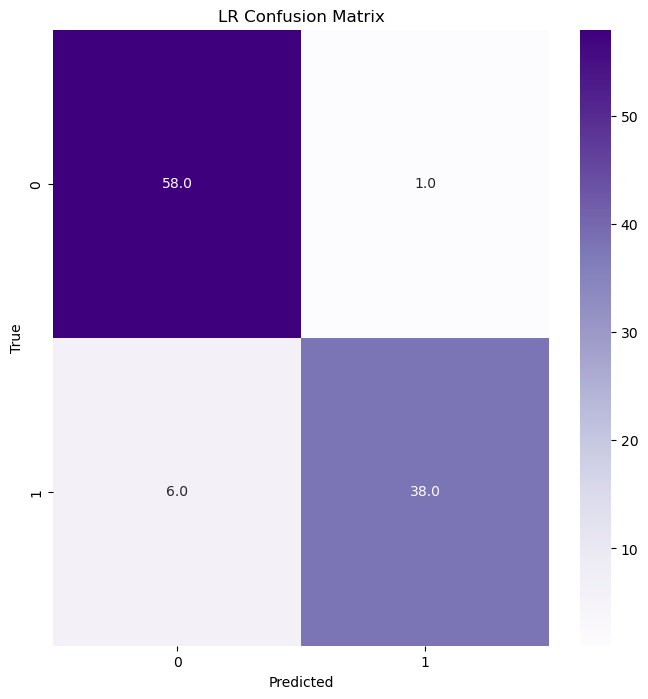

In [1170]:
### LR Model
LR_pred_classes = np.argmax(lr_pred,axis = 1) 
#Y_true = y_test2.to_numpy()

lr_confusion_mtx = confusion_matrix(y_test, LR_pred_classes) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(lr_confusion_mtx, annot=True,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("LR Confusion Matrix")
plt.show()

##### Evaluation
The NB model outperforms the LR model in False Negatives (FN), as the NB model had 5FNs and the LR model had 6FNs. It also outperformed the LR model in True Positives (TP) with one better accurate prediction.

The LR model outperformed the NB model in False Positives (FP), having one less FP than the NB model. It also outperformed  by 1 the NB model in True Negatives (TN).

#### Precision, Accuracy, Recall
Obtained these values using the functions declared earlier. With the data extrapolated from the confusion matrices above.

In [1155]:
#### NB Model
nb_precision = precision_macro_average(nb_confusion_mtx)
nb_recall = recall_macro_average(nb_confusion_mtx)
nb_accuracy = accuracy(nb_confusion_mtx)

print("precision total:", precision_macro_average(nb_confusion_mtx))
print("recall total:", recall_macro_average(nb_confusion_mtx))
print("accuracy total:", accuracy(nb_confusion_mtx))

precision total: 0.9352871754523997
recall total: 0.9262326656394453
accuracy total: 0.9320388349514563


In [1156]:
### LR Model
lr_precision = precision_macro_average(lr_confusion_mtx)
lr_recall = recall_macro_average(lr_confusion_mtx)
lr_accuracy = accuracy(lr_confusion_mtx)

print("precision total:", precision_macro_average(lr_confusion_mtx))
print("recall total:", recall_macro_average(lr_confusion_mtx))
print("accuracy total:", accuracy(lr_confusion_mtx))

precision total: 0.9403044871794872
recall total: 0.9233436055469955
accuracy total: 0.9320388349514563


##### Evaluation
Both models had the exact same accuracy of 93.2%, with the NB model having better recall and the LR model having higher precision. Although the difference in values are very minute. A higher recall indicates fewer false negatives, and a higher precision indicates the model is more accurately able to make a positive prediction.

#### ROC-AUC Curve
ROC indicates the plotted line, and AUC indicates the area under the ROC curve. It acts as a metric for classification problems by analysing a model's ability  to distinguish between classes, the higher the AUC indicates better class distinction.

$$
0 ≤ AUC ≤ 1 
$$

Using the sci-kitlearns metric package, in particular the roc_curve function, this was implemented via a function declared earlier. 

model 1 AUC score: 0.9262326656394453


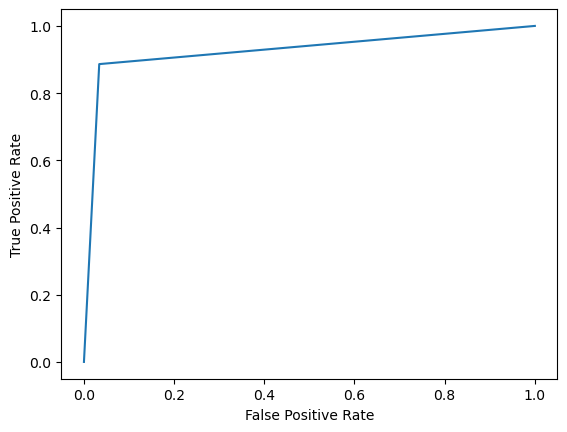

In [1157]:
#### NB Model
plot_roc_curve(y_test, NB_pred_classes)
nb_roc_Score = roc_auc_score(y_test, NB_pred_classes)
print(f'model 1 AUC score: {roc_auc_score(y_test, NB_pred_classes)}')

model 1 AUC score: 0.9233436055469955


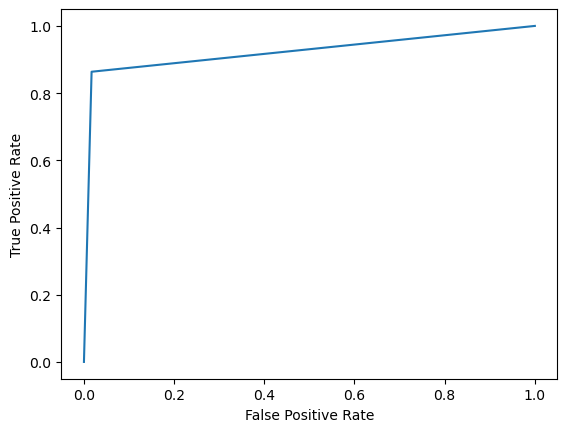

In [1158]:
### LR Model
plot_roc_curve(y_test, LR_pred_classes)
lr_roc_Score = roc_auc_score(y_test, LR_pred_classes)
print(f'model 1 AUC score: {roc_auc_score(y_test, LR_pred_classes)}')

##### Evaluation
The NB Model outperformed the LR model by ~0.3% in the AUC score indicating a better ability to distinguish the classes. 

#### Cohen Kappa Score
Using the sci-kitlearns metric package, in particular the cohen_kappa_score() function. This function implements works of Jacob Cohen which serves as a statistical measure of inter-rater agreement for categorical data. Cohen's Kappa Coefficient is defined as follows:


$$
k = \frac{P_o-P_e}{1-P_e}
$$
$$
0 ≤ k ≤ 1 
$$

where

where $P_o$ is the actual observed agreement amongst classfiiers, and $P_e$ is the hypothetical probability of random agreement. A $k = 1$ is a perfect agreement, and $k = 0$ indicates no agreement - the closer the coeffient is to 1 indicates a higher classification performance.

In [1159]:
#### NB Model
nb_cohen = cohen_kappa_score(Y_true,NB_pred_classes)
print("Cohen Kappa Score: " + str(nb_cohen))

Cohen Kappa Score: 0.859918399067418


In [1160]:
lr_cohen = cohen_kappa_score(y_test,LR_pred_classes)
print("Cohen Kappa Score: " + str(lr_cohen))

Cohen Kappa Score: 0.8590971272229821


##### Evaluation
The NB Model outperformed the LR model by ~0.08% according to Cohens Kappa coefficient, indicating a better agreement on categorical data. The difference is very minute, indicating that both models can succesfully distinguish between the two classes.

#### Classification Report
Using the sci-kitlearns metric package, in particular the classification_report() function. This function generates a string based output containing the precision, recall, f1-score, and support values for both classes, as well as a summary of the values.

In [1161]:
#### NB Model
nb_class_report = classification_report(y_test,NB_pred_classes)
print(nb_class_report)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        59
           1       0.95      0.89      0.92        44

    accuracy                           0.93       103
   macro avg       0.94      0.93      0.93       103
weighted avg       0.93      0.93      0.93       103



In [1162]:
#### LR Model
lr_class_report = classification_report(y_test,LR_pred_classes)
print(lr_class_report)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        59
           1       0.97      0.86      0.92        44

    accuracy                           0.93       103
   macro avg       0.94      0.92      0.93       103
weighted avg       0.94      0.93      0.93       103



## Evaluation

On the whole for the task of breast cancer classification, the Naive Bayes model, seemed to outperform the Logisitic Regression model, albeit by a small margin. When looking at the project, there are multiple aspects that could be changed and altered for next time to potentially yield better results. For example, in the EDA section I chose to drop columns that fell below a 0.70 correlation coefficient to the class. Another aspect that wasn't investigated, that may have influenced the performance was the fact that the class was imbalanced with 444 negative cases, and 239 positive cases. Another possible way to improve would be to gather a bigger dataset, so that there would be more data to test and compare it. Currently, there are 683 data points split in a 70:15:15 ratio leading to only 103 test sample. 